# (99942) Apophis propagation test

In [1]:
import grss
prop = grss.prop
fit = grss.fit

In [2]:
import numpy as np
np.set_printoptions(precision=40, linewidth=np.inf)
import matplotlib.pyplot as plt

In [3]:
pos = [-0.55946538550488512+0.001232781221250307, 0.85647564757574512-0.0012750764430978325, 0.30415066217102493-0.0005187131180711941]
vel = [-0.013818324735921638-4.1817715078240506e-07, -0.0060088275597939191+4.81738545944803e-06, -0.0025805044631309632+2.0787456036811378e-06]
ng_params = prop.NongravParamaters()
ng_params.a1 = 4.999999873689E-13
ng_params.a2 = -2.901085508711E-14
ng_params.a3 = 0.0
ng_params.alpha = 1.0
ng_params.k = 0.0
ng_params.m = 2.0
ng_params.n = 0.0
ng_params.r0_au = 1.0
init_cov = np.zeros((7, 7))

In [4]:
de_kernel = 441
de_kernel_path = grss.utils.default_kernel_path(de_kernel)
t0 = 62138.035998938605
tf = 62502.53724260954
prop_sim = prop.propSimulation("(99942) Apophis propagation test", t0, de_kernel, de_kernel_path)

In [5]:
t_temp = t0
t_eval = []
while t_temp <= tf:
    t_eval.append(t_temp)
    t_temp += 1.0

eval_apparent_state = False
t_eval_utc = False
converged_light_time = False
prop_sim.set_integration_parameters(tf, t_eval, t_eval_utc, eval_apparent_state, converged_light_time, dtMin=4e-3)

In [6]:
apophis = prop.IntegBody("(99942) Apophis", t0, 0.0, 0.0, pos, vel, init_cov, ng_params)
prop_sim.add_integ_body(apophis)

In [7]:
prop_sim.integrate()

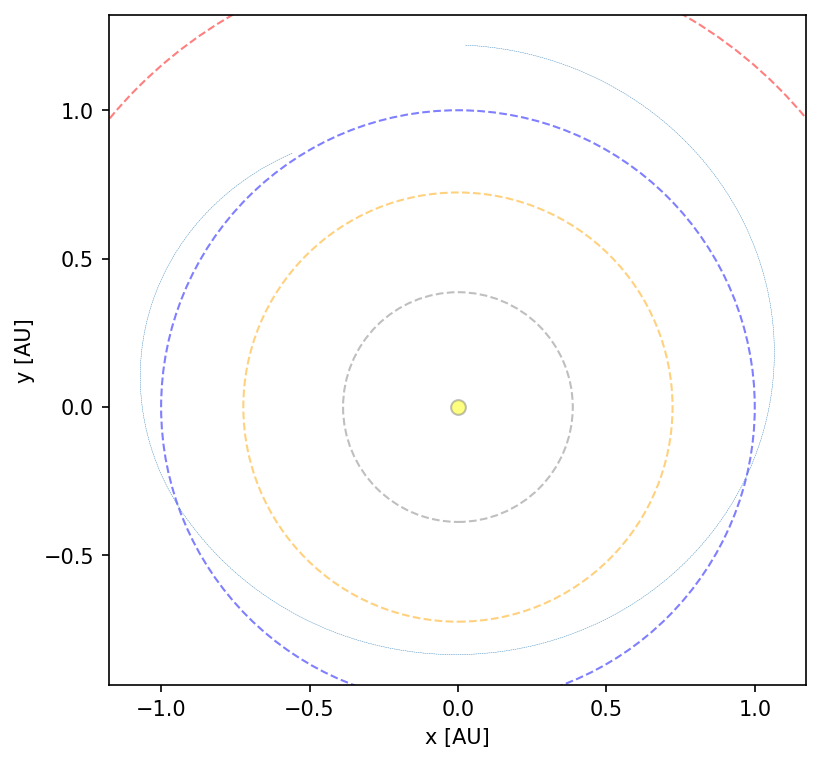

In [8]:
arr = np.array(prop_sim.xIntegEval)
# plot xy and xz projections of the orbit in a 2x1 subplot
plt.figure(figsize=(6, 6), dpi=150)
axs = plt.gca()
prop.plot_solar_system(axs, xy_plane=True, alpha=0.5)
axs.plot(arr[:,0], arr[:,1], '--', lw=0.2)
axs.set_xlabel("x [AU]")
axs.set_ylabel("y [AU]")
axs.set_aspect('equal')
plt.show(block=False)
plt.close()

In [9]:
jpl = np.array([0.017575542120147558, 1.2196672850476662, 0.4783965165437007, -0.013539283384755667, 0.0005355366349979586, -1.5069904336052799e-05])
grss = np.array(prop_sim.xInteg)
pos_diff = np.linalg.norm((jpl-grss)[:3])*prop_sim.consts.du2m
def test_apophis():
    assert pos_diff < 100.0